# Example Flattening the Curve

The top example shows no suppression wihle the bottom shows a 50% suppression policy.

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


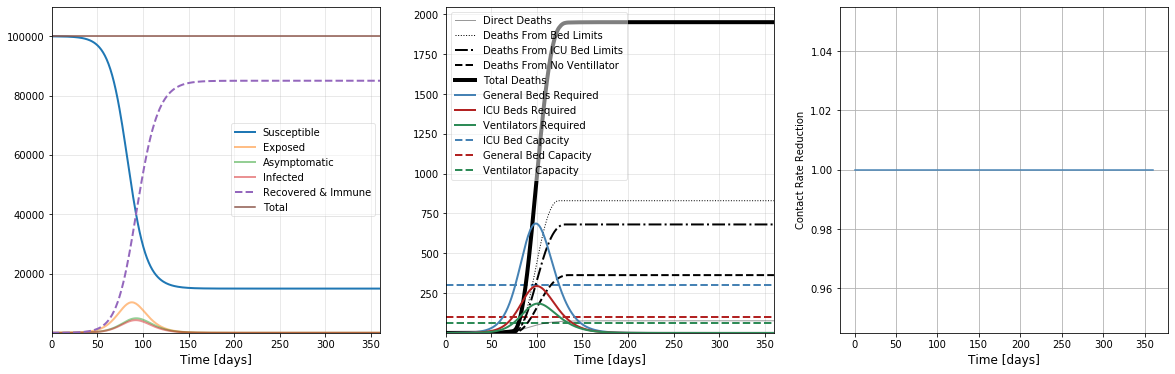

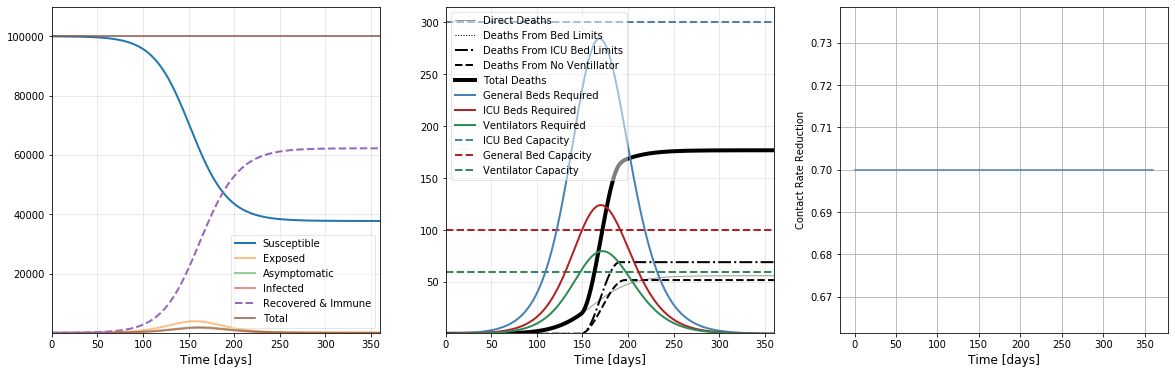

In [9]:
%load_ext autoreload
%autoreload 2
import sys

import numpy as np
from pyseir.models.seir_model import SEIRModel
from pyseir.models.suppression_policies import generate_triggered_suppression_model
import matplotlib.pyplot as plt

n_days = 360
t_list = np.linspace(0, n_days, n_days)
suppression_policy = generate_triggered_suppression_model(t_list=t_list, lockdown_days=1, open_days=0, reduction=1)


model = SEIRModel(
    N=100000,
    A_initial=5,
    I_initial=5,
    t_list=t_list,
    suppression_policy=suppression_policy)

model.run()
model.plot_results(y_scale='linear')


suppression_policy = generate_triggered_suppression_model(t_list=t_list, lockdown_days=1000, open_days=1, reduction=.7)
model = SEIRModel(
    N=100000,
    A_initial=5,
    I_initial=5,
    t_list=t_list,
    suppression_policy=suppression_policy)

model.run()
model.plot_results(y_scale='linear')

# Optimal Parametric Policies
Optimize a peicewise discontinuous set of suppression models (between bounds) to minimize the total death count.

In [15]:
from pyseir.models import suppression_policies
from pyseir.optimization import PolicyOptimizer

N_piecewise_segments = 12

# Start with an initial policy of 50% suppression indefinitely.
# The 0.5 first parameter for this policy is how to increase the intervals as a power-law between the first segments.
x0 = [.5] + [1.2, .5, .5, 0.5, .5, 1]

# Min/max levels of suppression acheivable. 0.2 is extreme isolation, 2 = chicken pox parties.
min_suppression_level, max_suppression_level = 2, 0.6
optimization_bounds = [(.1, 3)] + [(max_suppression_level, min_suppression_level)] * N_piecewise_segments

optimizer = PolicyOptimizer(
    seir_model_class=SEIRModel,
    seir_model_args=dict(
         N=100000,
         A_initial=5,
         I_initial=5,
         t_list=np.linspace(0, 1440, 720)
    ),
    parametric_policy=suppression_policies.piecewise_parametric_policy,
    x0=x0,
    optimization_bounds=optimization_bounds
)

optimizer.run(method='trust-constr')


 barrier_parameter: 0.004000000000000001
 barrier_tolerance: 0.004000000000000001
          cg_niter: 130
      cg_stop_cond: 4
            constr: [array([0.24582832, 0.60548154, 0.60000083, 0.6656579 , 0.60015087,
       0.80202068, 1.25878158])]
       constr_nfev: [0]
       constr_nhev: [0]
       constr_njev: [0]
    constr_penalty: 1.0
  constr_violation: 0.0
    execution_time: 12.618704795837402
               fun: 41.84470249107676
              grad: array([-9.00039673e-02,  1.27190908e+02,  1.38593910e+02,  1.93063688e+00,
       -4.12540436e-02, -2.36244202e-02,  3.08831203e-02])
               jac: [<7x7 sparse matrix of type '<class 'numpy.float64'>'
	with 7 stored elements in Compressed Sparse Row format>]
   lagrangian_grad: array([-2.40847275e-03,  3.79973360e-03, -3.22438609e-09,  8.01920344e-03,
       -6.04369349e-07, -1.53002601e-03,  5.89497417e-03])
           message: '`gtol` termination condition is satisfied.'
            method: 'tr_interior_point'
         

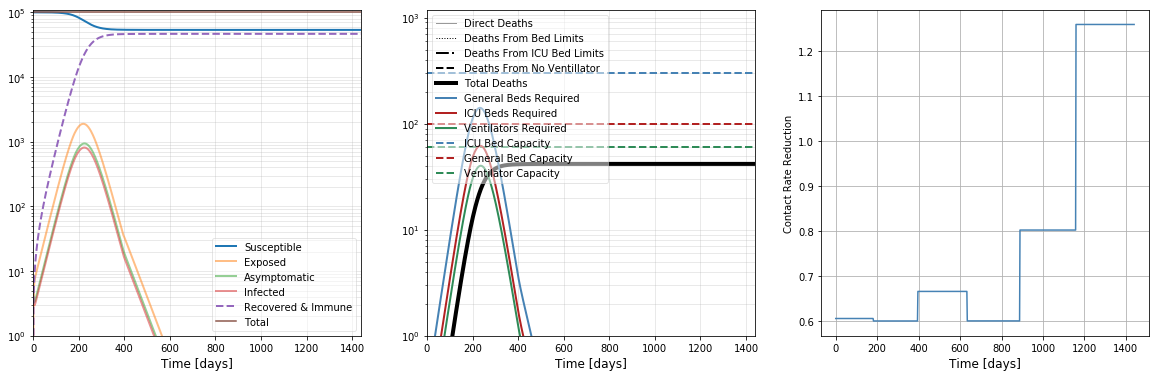

In [16]:
optimizer.plot_optimal_model()

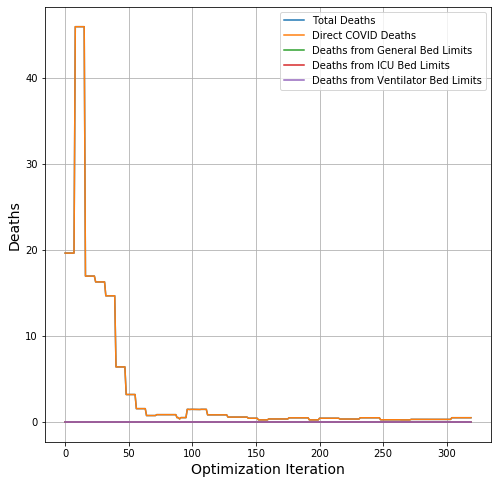

In [30]:
optimizer.plot_loss()